In [ ]:
from cp_dataset import CPDataset, CPDataLoade
file_path = 'data/train_pairs.txt'  # Đường dẫn tới file train_pairs.txt
with open(file_path, 'r') as file:
    data = file.readlines()
# Đếm số lượng dòng trong tệp (mỗi dòng tương ứng với một mẫu dữ liệu)
num_data = len(data)
print("Số lượng mẫu dữ liệu trong tệp:", num_data)

# Dùng các giá trị để in ra kết quả
data_loader = CPDataLoader(opt, dataset)
print('Size of the dataset: %05d, dataloader: %04d' % (num_data, len(data_loader.data_loader)))


In [6]:
#chạy tensorboard với 2 dữ liệu train
%load_ext tensorboard
%tensorboard --logdir tensorboard/GMM/gmm_1  --port 6071

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [16]:
#chạy tensorboard với 3 dữ liệu train
%load_ext tensorboard
%tensorboard --logdir tensorboard/GMM/gmm_3 --port 6080

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6080 (pid 21748), started 0:01:23 ago. (Use '!kill 21748' to kill it.)

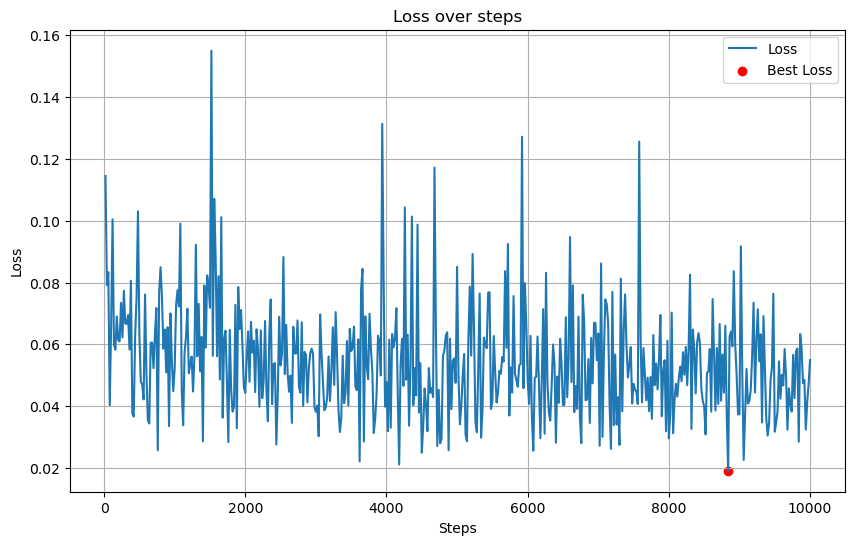

Kết quả tốt nhất: Loss = 0.019102664664387703 tại bước thứ 8840
Thời gian: 2023-11-11 14:39:06
Kết quả tệ nhất: Loss = 0.15501077473163605 tại bước thứ 1520
Thời gian: 2023-11-11 14:13:28
Kết quả trung bình IoU đạt được: 0.9455144516862929
Kết quả tốt với độ chồng lớn.


In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
from datetime import datetime

# Đường dẫn đến folder log của TensorBoard
LOG_DIR = 'tensorboard/GMM/gmm_3'

event_acc = EventAccumulator(LOG_DIR)
event_acc.Reload()

# Lấy dữ liệu từ event accumulator
tags = event_acc.Tags()['scalars']

# Trích xuất thông tin loss
losses = []
steps = []
wall_times = []
for tag in tags:
    if 'loss' in tag:
        events = event_acc.Scalars(tag)
        losses = [event.value for event in events]
        steps = [event.step for event in events]
        wall_times = [event.wall_time for event in events]

# Tìm bước tốt nhất và thời gian tương ứng
best_loss = min(losses)
best_step = steps[losses.index(best_loss)]
best_time = wall_times[losses.index(best_loss)]
best_time_str = datetime.fromtimestamp(best_time).strftime('%Y-%m-%d %H:%M:%S')

# Tìm bước tệ nhất và thời gian tương ứng
worst_loss = max(losses)
worst_step = steps[losses.index(worst_loss)]
worst_time = wall_times[losses.index(worst_loss)]
worst_time_str = datetime.fromtimestamp(worst_time).strftime('%Y-%m-%d %H:%M:%S')

# Tính toán IoU dựa trên giá trị loss (giả định)
iou_values = [(1 - loss) for loss in losses]  # Ước lượng IoU dựa trên giá trị loss

# Tính toán giá trị trung bình IoU
average_iou = sum(iou_values) / len(iou_values)

# Thêm giá trị IoU vào danh sách
iou_values.append(average_iou)

# Vẽ sơ đồ loss
plt.figure(figsize=(10, 6))
plt.plot(steps, losses, label='Loss')
plt.scatter(best_step, best_loss, color='red', marker='o', label='Best Loss')  # Thêm điểm cho kết quả tốt nhất
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss over steps')
plt.legend()
plt.grid(True)
plt.show()

print(f"Kết quả tốt nhất: Loss = {best_loss} tại bước thứ {best_step}")
print(f"Thời gian: {best_time_str}")

print(f"Kết quả tệ nhất: Loss = {worst_loss} tại bước thứ {worst_step}")
print(f"Thời gian: {worst_time_str}")

# In ra kết quả trung bình IoU
print(f"Kết quả trung bình IoU đạt được: {average_iou}")

# Đánh giá dựa trên kết quả trung bình IoU
threshold_high_iou = 0.75
threshold_low_iou = 0.6

if average_iou >= threshold_high_iou:
    print("Kết quả tốt với độ chồng lớn.")
elif average_iou >= threshold_low_iou:
    print("Kết quả ổn định với độ chồng trung bình.")
else:
    print("Kết quả không tốt với độ chồng thấp.")


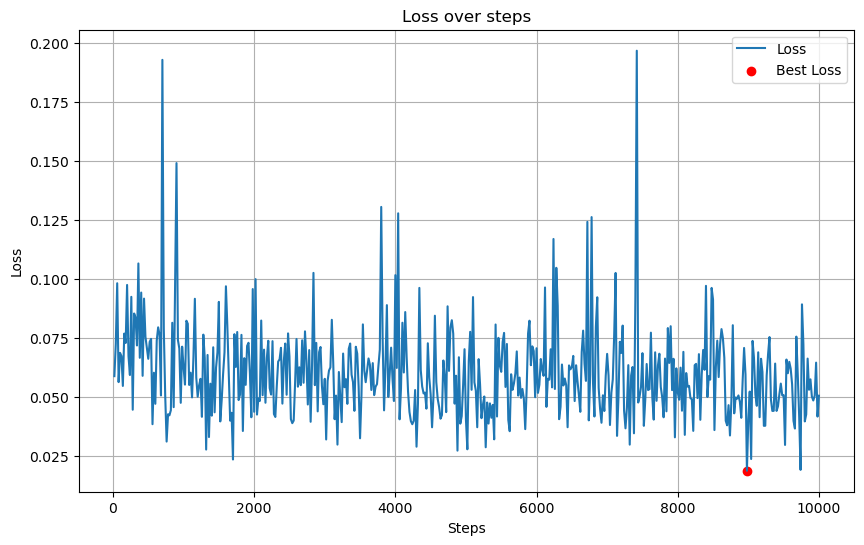

Kết quả tốt nhất: Loss = 0.018664482980966568 tại bước thứ 8980
Thời gian: 2023-11-11 13:03:55
Kết quả tệ nhất: Loss = 0.19662316143512726 tại bước thứ 7420
Thời gian: 2023-11-11 12:59:24
Kết quả trung bình IoU đạt được: 0.9400887133851648
Kết quả tốt với độ chồng lớn.


In [11]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
from datetime import datetime

# Đường dẫn đến folder log của TensorBoard
LOG_DIR = 'tensorboard/GMM/gmm_1'

event_acc = EventAccumulator(LOG_DIR)
event_acc.Reload()

# Lấy dữ liệu từ event accumulator
tags = event_acc.Tags()['scalars']

# Trích xuất thông tin loss
losses = []
steps = []
wall_times = []
for tag in tags:
    if 'loss' in tag:
        events = event_acc.Scalars(tag)
        losses = [event.value for event in events]
        steps = [event.step for event in events]
        wall_times = [event.wall_time for event in events]

# Tìm bước tốt nhất và thời gian tương ứng
best_loss = min(losses)
best_step = steps[losses.index(best_loss)]
best_time = wall_times[losses.index(best_loss)]
best_time_str = datetime.fromtimestamp(best_time).strftime('%Y-%m-%d %H:%M:%S')

# Tìm bước tệ nhất và thời gian tương ứng
worst_loss = max(losses)
worst_step = steps[losses.index(worst_loss)]
worst_time = wall_times[losses.index(worst_loss)]
worst_time_str = datetime.fromtimestamp(worst_time).strftime('%Y-%m-%d %H:%M:%S')

# Tính toán IoU dựa trên giá trị loss (giả định)
iou_values = [(1 - loss) for loss in losses]  # Ước lượng IoU dựa trên giá trị loss

# Tính toán giá trị trung bình IoU
average_iou = sum(iou_values) / len(iou_values)

# Thêm giá trị IoU vào danh sách
iou_values.append(average_iou)

# Vẽ sơ đồ loss
plt.figure(figsize=(10, 6))
plt.plot(steps, losses, label='Loss')
plt.scatter(best_step, best_loss, color='red', marker='o', label='Best Loss')  # Thêm điểm cho kết quả tốt nhất
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss over steps')
plt.legend()
plt.grid(True)
plt.show()

print(f"Kết quả tốt nhất: Loss = {best_loss} tại bước thứ {best_step}")
print(f"Thời gian: {best_time_str}")

print(f"Kết quả tệ nhất: Loss = {worst_loss} tại bước thứ {worst_step}")
print(f"Thời gian: {worst_time_str}")

# In ra kết quả trung bình IoU
print(f"Kết quả trung bình IoU đạt được: {average_iou}")

# Đánh giá dựa trên kết quả trung bình IoU
threshold_high_iou = 0.75
threshold_low_iou = 0.6

if average_iou >= threshold_high_iou:
    print("Kết quả tốt với độ chồng lớn.")
elif average_iou >= threshold_low_iou:
    print("Kết quả ổn định với độ chồng trung bình.")
else:
    print("Kết quả không tốt với độ chồng thấp.")


In [13]:
# tiến hành train 
%run train.py --name GMM --stage GMM --workers 4 --save_count 200 --shuffle

In [18]:
# coding=utf-8
import torch
import torch.nn as nn
import torch.nn.functional as F

import argparse
import os
import time
from cp_dataset import CPDataset, CPDataLoader
from networks import GMM, UnetGenerator, load_checkpoint

from tensorboardX import SummaryWriter

from visualization import board_add_image, board_add_images, save_images

import matplotlib.pyplot as plt

def test_gmm(opt, test_loader, model, board):
    model.cuda()
    model.eval()

    # Load image
    im_path = 'path/to/image.jpg'
    im = Image.open(im_path).convert('RGB')
    im = np.array(im)
    im = torch.from_numpy(im).float().permute(2, 0, 1).unsqueeze(0).cuda()

    # Predict grid
    grid, theta = model(im)

    # Warp cloth
    warped_cloth = F.grid_sample(im.clone(), grid, padding_mode='border')

    # Show results
    plt.imshow(warped_cloth.cpu().data.numpy().transpose(1, 2, 0))
    plt.show()


In [25]:
%run test.py

Namespace(name='GMM', gpu_ids='', workers=1, batch_size=4, dataroot='data', datamode='test', stage='GMM', data_list='test_pairs.txt', fine_width=192, fine_height=256, radius=5, grid_size=5, tensorboard_dir='tensorboard', result_dir='result', checkpoint='checkpoints/GMM/gmm_final.pth', display_count=1, shuffle=False)
Start to test stage: GMM, named: GMM!
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\Tool\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2903, in safe_execfile
    py3compat.execfile(
  File "D:\Tool\anaconda3\Lib\site-packages\IPython\utils\py3compat.py", line 55, in execfile
    exec(compiler(f.read(), fname, "exec"), glob, loc)
  File "C:\Users\phuoc\CP_VITON\cp-vton-plus-master\test.py", line 229, in <module>
    main()
  File "C:\Users\phuoc\CP_VITON\cp-vton-plus-master\test.py", line 203, in main
    test_loader = CPDataLoader(opt, test_dataset)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\phuoc\CP_VITON\cp-vton-plus-master\cp_dataset.py", line 199, in __init__
    self.data_iter = self.data_loader.__iter__()
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Tool\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py", line 441, in __iter__
    return self._get_iterator()
           ^^^^^^^^^^^^^^^^^^^^
  File "D:\Tool\anaconda3\Lib\site-packages\torch\utils\dat